<a href="https://colab.research.google.com/github/ArtemOsokin/mgpu_python_for_data_analysis/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python Для Анализа/data/bikes_rent.csv')

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

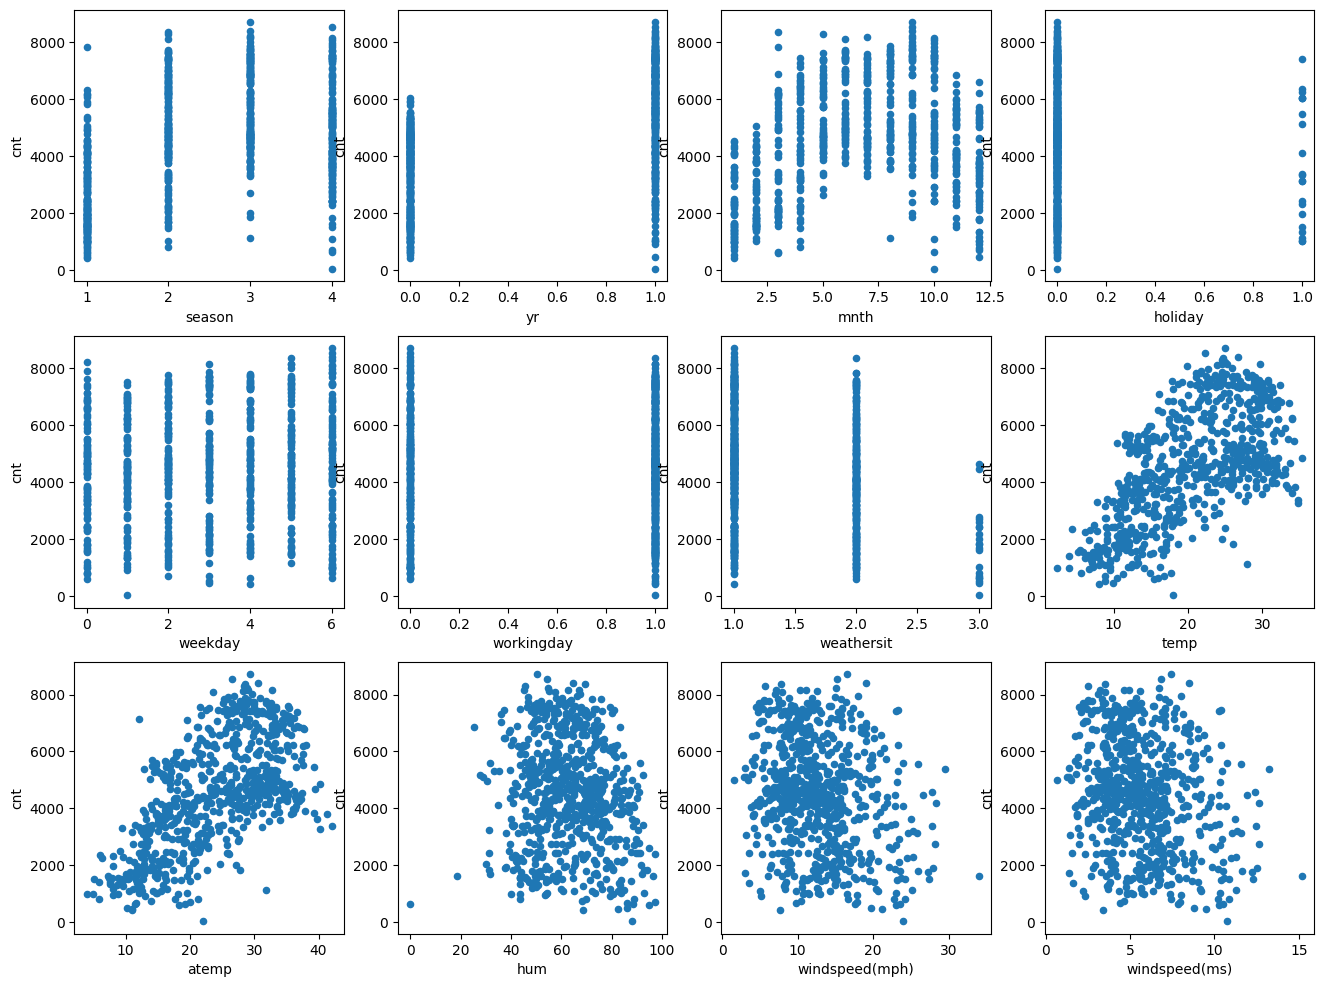

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: Есть зависимость от месяца (в самые благоприятные месяца прокатов больше всего)

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ:

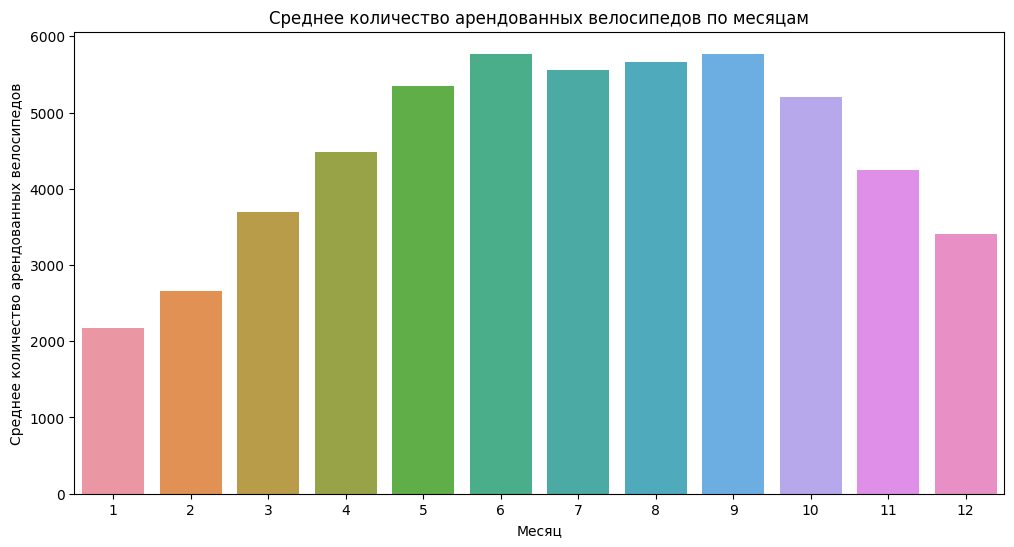

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='mnth', y='cnt', data=df, errorbar=None)
plt.title('Среднее количество арендованных велосипедов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднее количество арендованных велосипедов')
plt.show()

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ:
Больше всего с **температурой**, **сезоном** и **годом**
Меньше всего с **днем недели** и **рабочими дни**


---



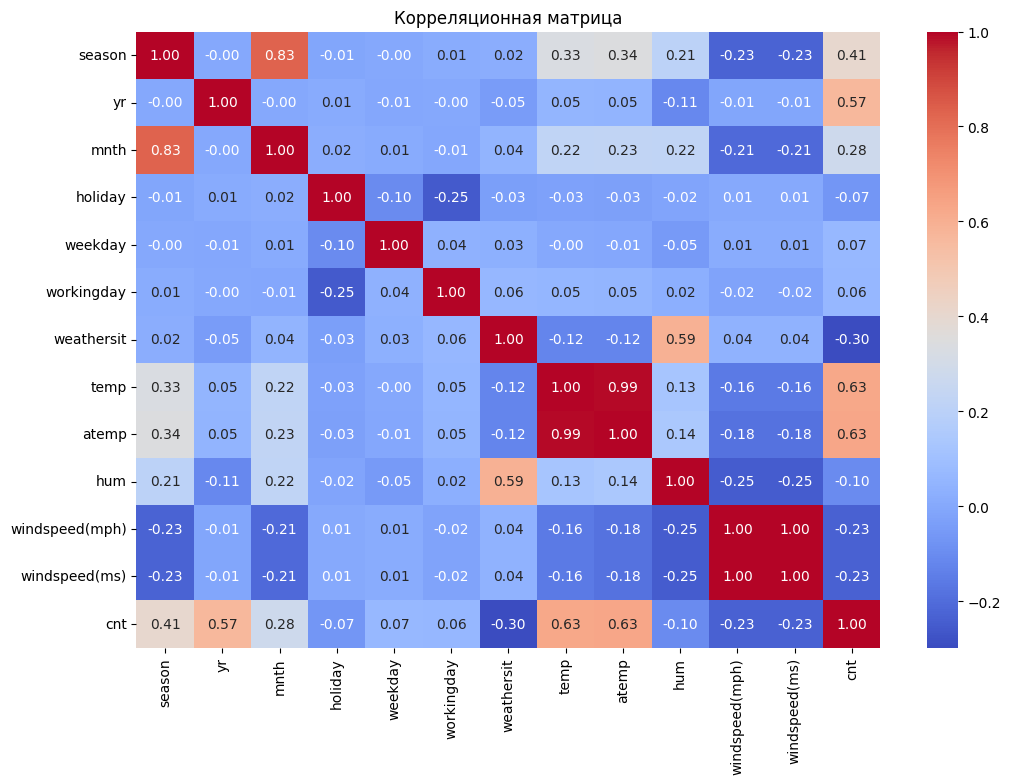

In [15]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: с течением времени велосипеды становятся более популярными или доступными, что приводит к увеличению общего спроса

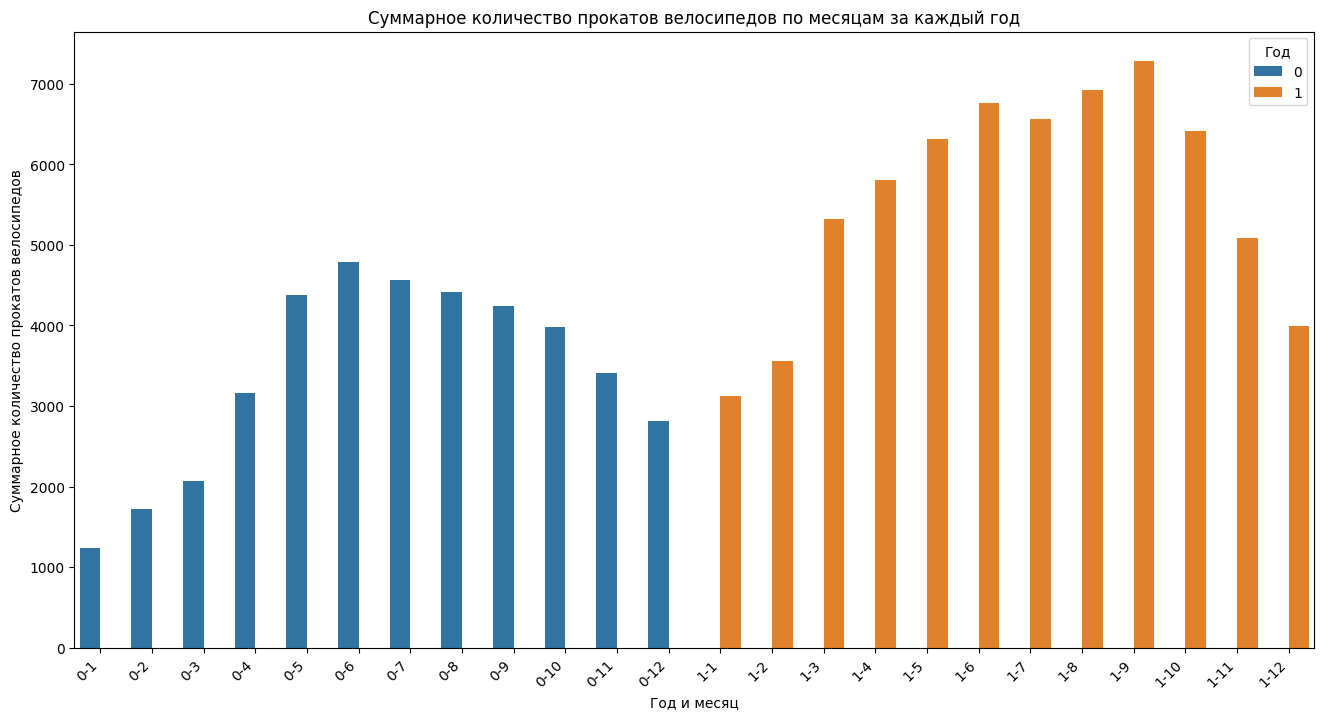

In [17]:
df['year_month'] = df['yr'].astype(str) + '-' + df['mnth'].astype(str)

plt.figure(figsize=(16, 8))
sns.barplot(x='year_month', y='cnt', hue='yr', data=df, errorbar=None)
plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.xlabel('Год и месяц')
plt.ylabel('Суммарное количество прокатов велосипедов')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Год')
plt.show()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: в датасете примерно одинаковое количество записей для каждого дня недели. Это может указывать на то, что данные собраны равномерно в разные дни недели. Также здесь встречаются различные оценки погодных условий. Это может быть полезно для понимания, как качество погоды влияет на количество прокатов.

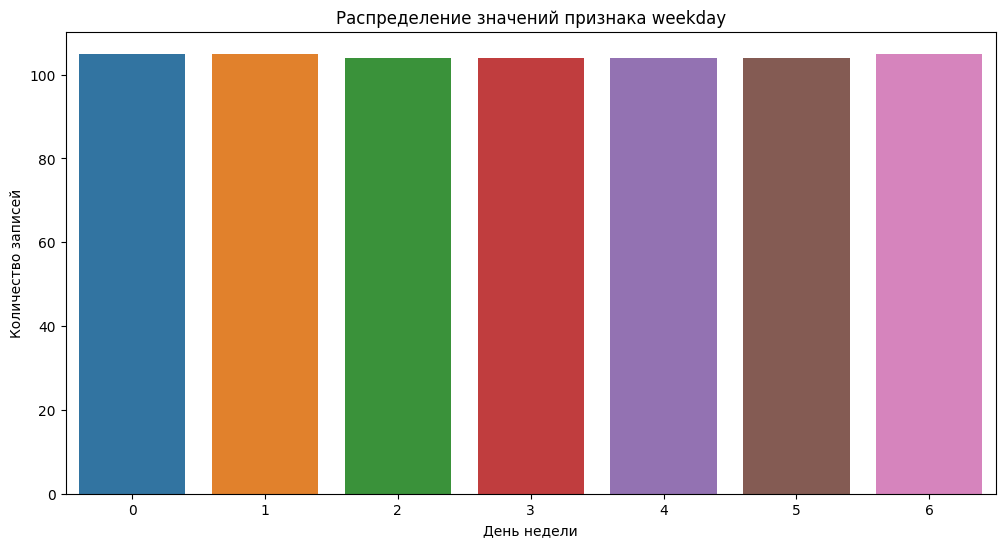

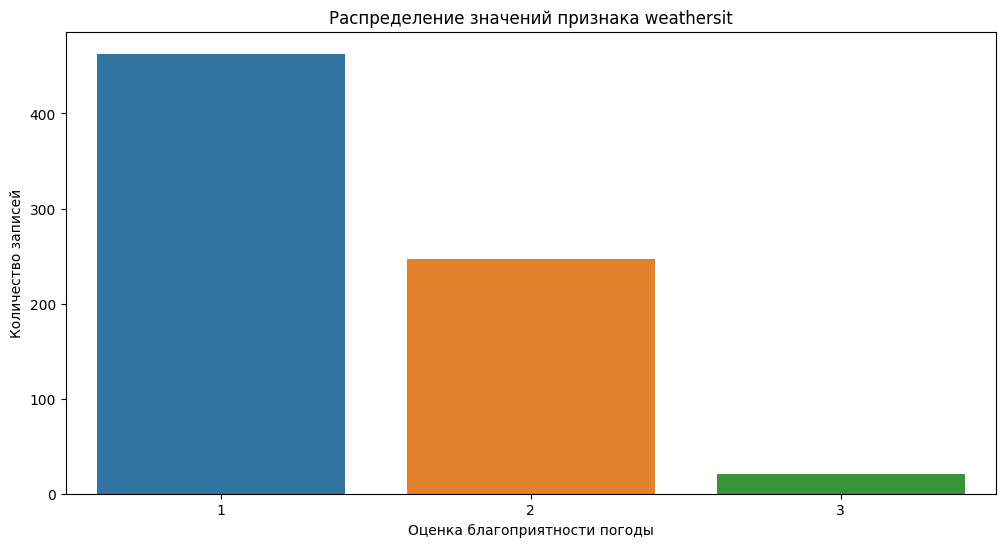

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weekday', data=df)
plt.title('Распределение значений признака weekday')
plt.xlabel('День недели')
plt.ylabel('Количество записей')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='weathersit', data=df)
plt.title('Распределение значений признака weathersit')
plt.xlabel('Оценка благоприятности погоды')
plt.ylabel('Количество записей')
plt.show()

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: В среднем прокатов ±4500 в день

Ответ: Нормальное (гауссово) распределение

In [24]:
df.groupby('weekday')['cnt'].mean().reset_index()

,weekday,cnt
0,0,4228.828571
1,1,4338.123810
2,2,4510.663462
3,3,4548.538462
4,4,4667.259615
5,5,4690.288462
6,6,4550.542857


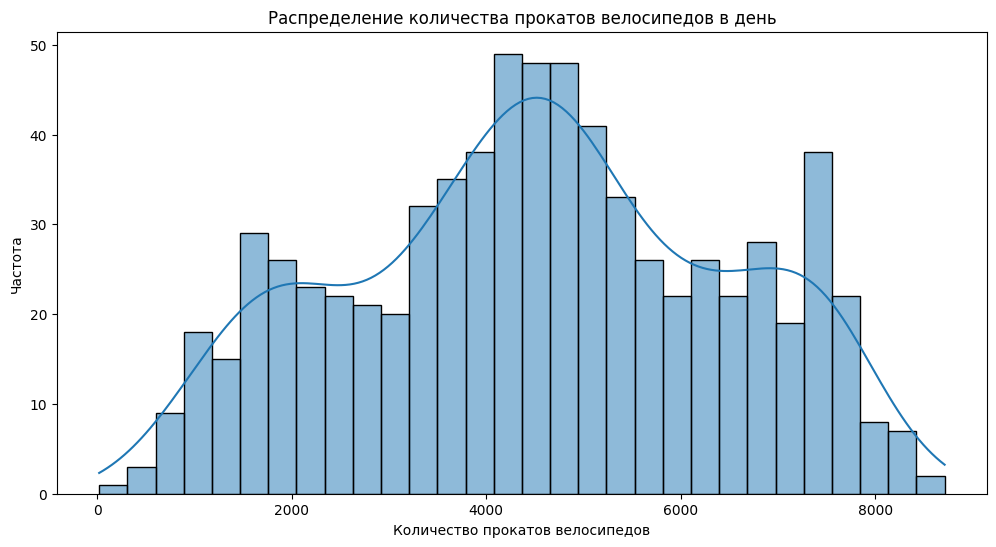

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title('Распределение количества прокатов велосипедов в день')
plt.xlabel('Количество прокатов велосипедов')
plt.ylabel('Частота')
plt.show()

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Точки на графике выстраиваются приблизительно вдоль прямой, это может указывать на линейную зависимость между двумя признаками.

Также здесь присутствуют выбросы (аномалии)

Можно также подумать что при температуре 20 данные сильно скоррелированы, что может говорить о дублирование информации

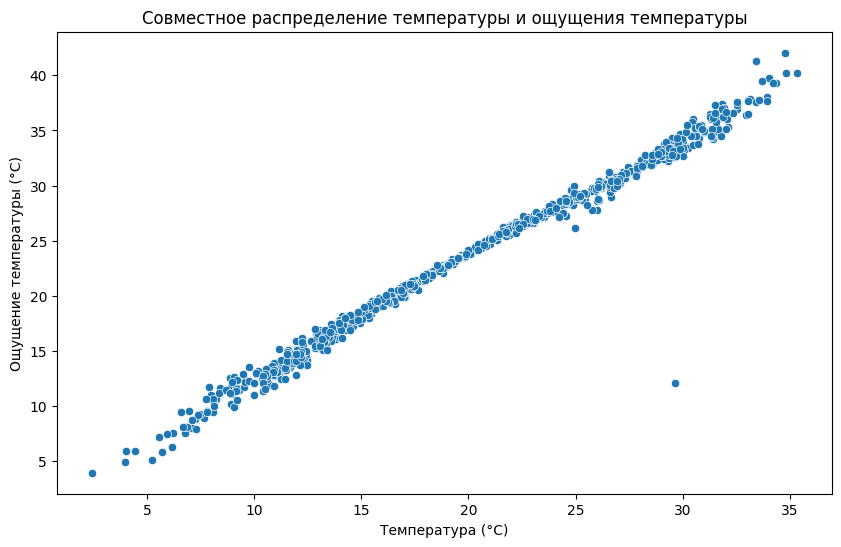

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='atemp', data=df)
plt.title('Совместное распределение температуры и ощущения температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Ощущение температуры (°C)')
plt.show()

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: В некоторых месяцах (например, летние месяцы), в выходные дни спрос на велосипеды может быть выше. Это может быть связано с тем, что в теплое время года люди предпочитают проводить больше времени на улице в выходные дни, включая прогулки на велосипеде. В то время как в холодные месяцы, спрос на велосипеды в выходные дни может быть меньше из-за менее благоприятных погодных условий. Также, возможно, в некоторых месяцах происходят особые события или праздники, что также может влиять на предпочтения в выборе дня для аренды велосипеда.

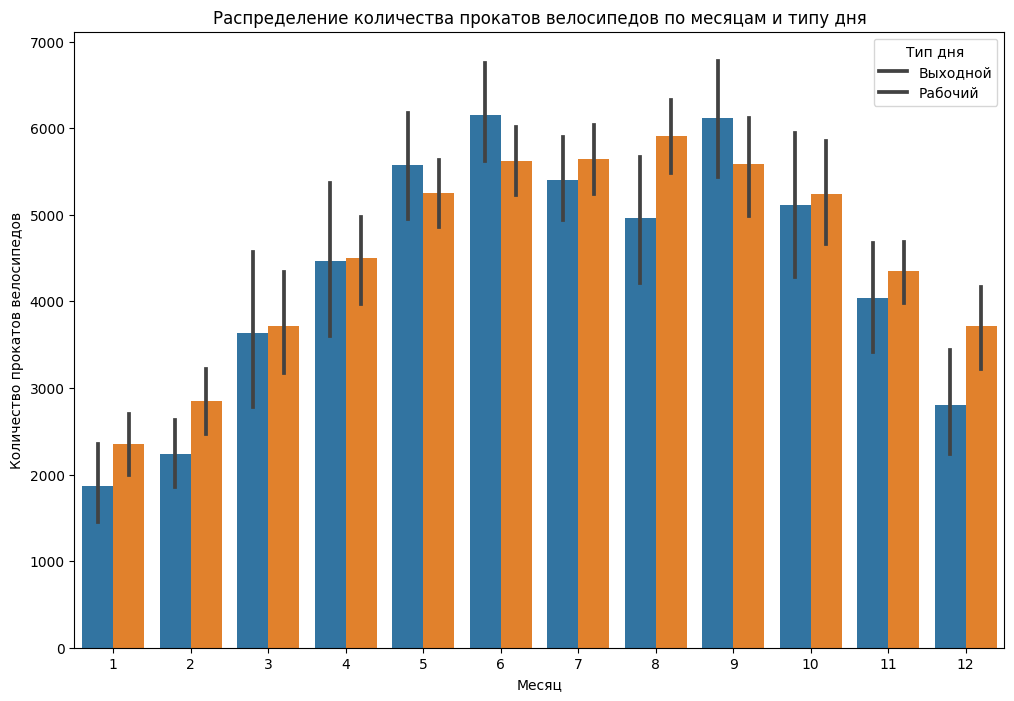

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='mnth', y='cnt', hue='workingday', data=df)
plt.title('Распределение количества прокатов велосипедов по месяцам и типу дня')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов велосипедов')
plt.legend(title='Тип дня', labels=['Выходной', 'Рабочий'])
plt.show()

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение:
Для рассуждения мы вводим новый признак "разницу между температурой и ощущением температуры".
При увеличении скорости ветра разница между температурой и ощущением температуры немного увеличивается. Нельзя также утверждать это однозначно, т.к. ощущения могут влиять и другие факторы, такие как влажность


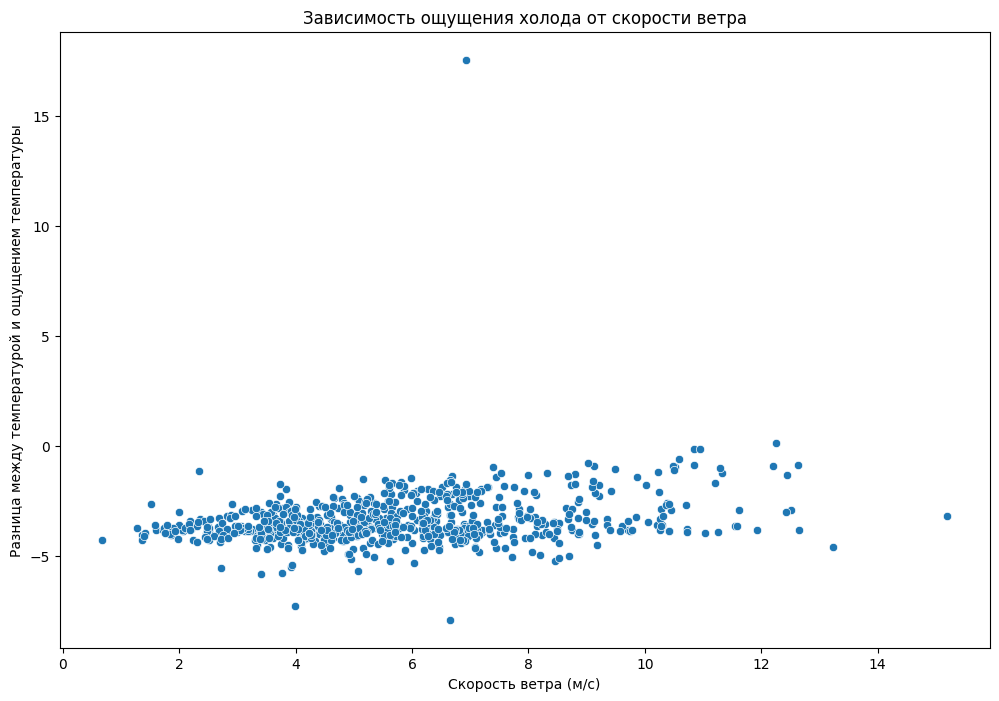

In [38]:
df['temperature_diff'] = df['temp'] - df['atemp']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='windspeed(ms)', y='temperature_diff', data=df)
plt.title('Зависимость ощущения холода от скорости ветра')
plt.xlabel('Скорость ветра (м/с)')
plt.ylabel('Разница между температурой и ощущением температуры')
plt.show()

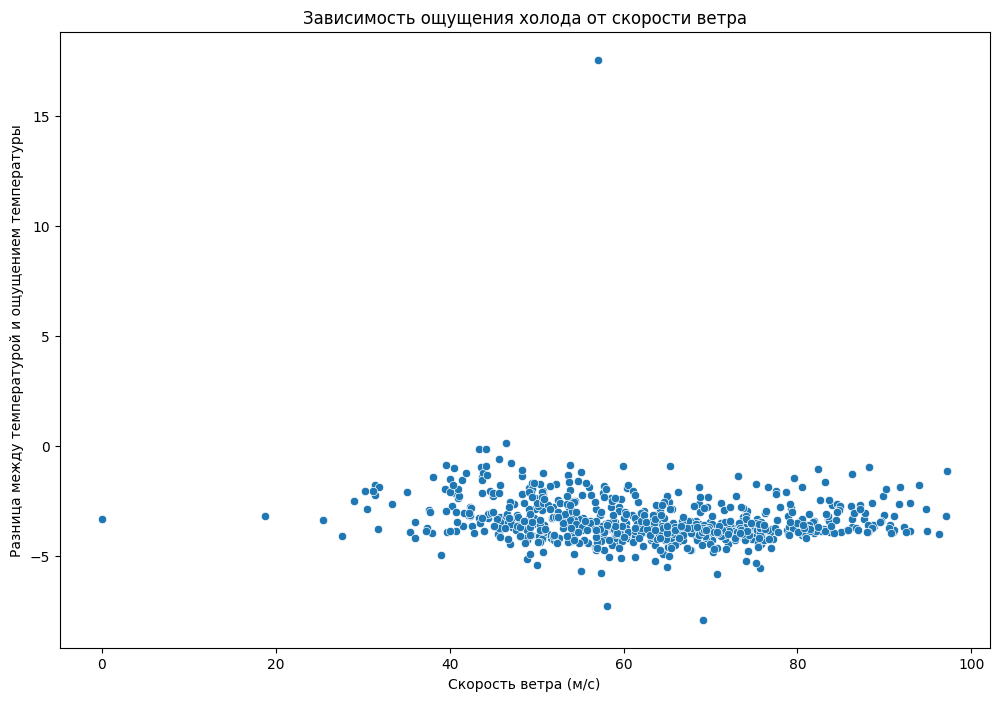

In [39]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='hum', y='temperature_diff', data=df)
plt.title('Зависимость ощущения холода от скорости ветра')
plt.xlabel('Влажность')
plt.ylabel('Разница между температурой и ощущением температуры')
plt.show()